In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",font_scale=1)
import warnings
warnings.filterwarnings('ignore')
import calendar

In [3]:
# Importing Dataset
d=pd.read_csv(r"D:\Users\91997\Desktop\Samarth\certificates\oasis_infobyte\Unemployment in India.csv")

In [4]:
d2=pd.read_csv(r"D:\Users\91997\Desktop\Samarth\certificates\oasis_infobyte\Unemployment_Rate_upto_11_2020.csv")

In [5]:
d

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Lets check for null values
d.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
d[d.isnull()]  # will be dropped directly

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
d=d.dropna()

In [9]:
# checking data types
d.dtypes.to_frame().rename(columns={0:'Data Types'})
# Date columns is object to be converted to date data type

,Data Types
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [10]:
# Feature Engineering
d['Date']=pd.to_datetime(d[' Date'],dayfirst=True)
d.drop(columns=' Date',inplace=True)
d['Month']=d['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
d['Year']=d['Date'].dt.year
d['Weekday']=d['Date'].dt.weekday
d['Year_Month']=d.Date.apply(lambda x:'-'.join(str(x).split('-')[:-1]))

In [11]:
# Numerical and Categorical columns
num=[i for i in d.select_dtypes(np.number).columns]
cat=[i for i in d.select_dtypes('object')]

In [12]:
# Checking constistency of each column.

In [13]:
d[cat].nunique().sort_values()

 Frequency     2
Area           2
Month         12
Year_Month    14
Region        28
dtype: int64

In [232]:
for i in cat:
    print(i,' : \n',d[i].unique(),sep='')
    print()

Region : 
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']

 Frequency : 
[' Monthly' 'Monthly']

Area : 
['Rural' 'Urban']

Month : 
['May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr']

Year_Month : 
['2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06']



In [233]:
# Frequency column is to be deleted
d.drop(columns=' Frequency',inplace=True)

In [208]:
# Statistical Summary
round(d.describe(),2).T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate (%),42.63,8.11,13.33,38.06,41.16,45.50,72.57
Year,2019.42,0.49,2019.00,2019.00,2019.00,2020.00,2020.00
Weekday,3.30,1.94,0.00,1.00,4.00,5.00,6.00


### Observations

* We can observe that the maxium unemployment rate was almost near to 77% which is very huge. 
* It menas that more than 3/4 of employees layoffs were done.

* We can also observe that the maximum labour rate was almost near to 73% which is very huge.

### Insights

* We can fetch those state names having those kind of drastic rate values.

In [236]:
pd.concat((d.loc[d[' Estimated Unemployment Rate (%)']==d[' Estimated Unemployment Rate (%)'].max()],d.loc[d[' Estimated Employed']==d[' Estimated Employed'].min()]))

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Month,Year,Weekday,Year_Month
627,Puducherry,76.74,68122.0,35.54,Urban,2020-04-30,Apr,2020,3,2020-04
242,Puducherry,74.51,49420.0,46.79,Rural,2020-04-30,Apr,2020,3,2020-04


### Insight
* **Puducherry** is having that drastic **Decrement in Unemployment Rate** at the time of **April 2020**.

In [212]:
# Region wise Unemployment Rate, Labour Participation rate
x=round(d.groupby('Region')[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)'].mean(),2).sort_values([' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)'],ascending=False)
x

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Region,,,
Tripura,28.35,717002.64,61.82
Haryana,26.28,3557072.46,42.74
Jharkhand,20.58,4469240.43,41.67
Bihar,18.92,12366189.14,38.15
Himachal Pradesh,18.54,1059823.71,44.22
Delhi,16.50,2627512.86,38.93
Jammu & Kashmir,16.19,1799931.67,41.03
Chandigarh,15.99,316831.25,39.34
Rajasthan,14.06,10041064.75,39.97


### Insights

* Tripura was having the highest avergae amount of Unemployment Rate
* Meghalaya was having the lowest average amount of Unemployment Rate

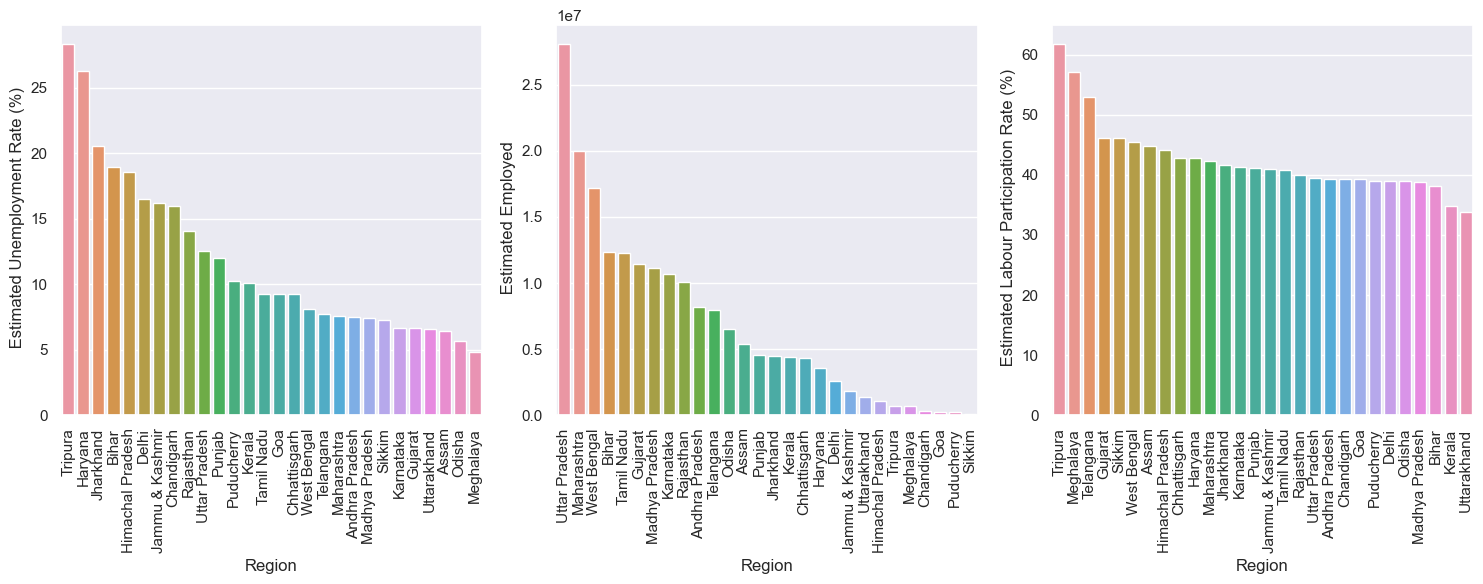

In [215]:
plt.figure(figsize=(15,6))
ii=1
for i in x.columns:
    plt.subplot(1,3,ii)
    a=x[i].sort_values(ascending=False)
    sns.barplot(x=a.index,y=a)
    plt.xticks(rotation=90)
    ii+=1
plt.tight_layout()
plt.show()

### Insights

1. We can clearly observe that **Tripura** is having the Highest Average Unemplyment Rate followed by **Haryana**.
2. **Meghalaya** state is having the lowest Average Unemplyment Rate followed by **Odisha**.
3. We can observe that **Tripura** is having the highest Labour participation Rate followed by **Meghalaya**.
4. We can also observe that **uttarakhand** is having the lowest Labour participation Rate followed by **Kerala**.
5. We can observe that **Uttar Pradesh** is having the highest total estimated employed followed by **Maharashtra**.
6. **Sikkim** is having the lowest total estimated employed followed by **chandigarh**.
7. So we can make an insight that estimated employe is totally dependend on populatuion

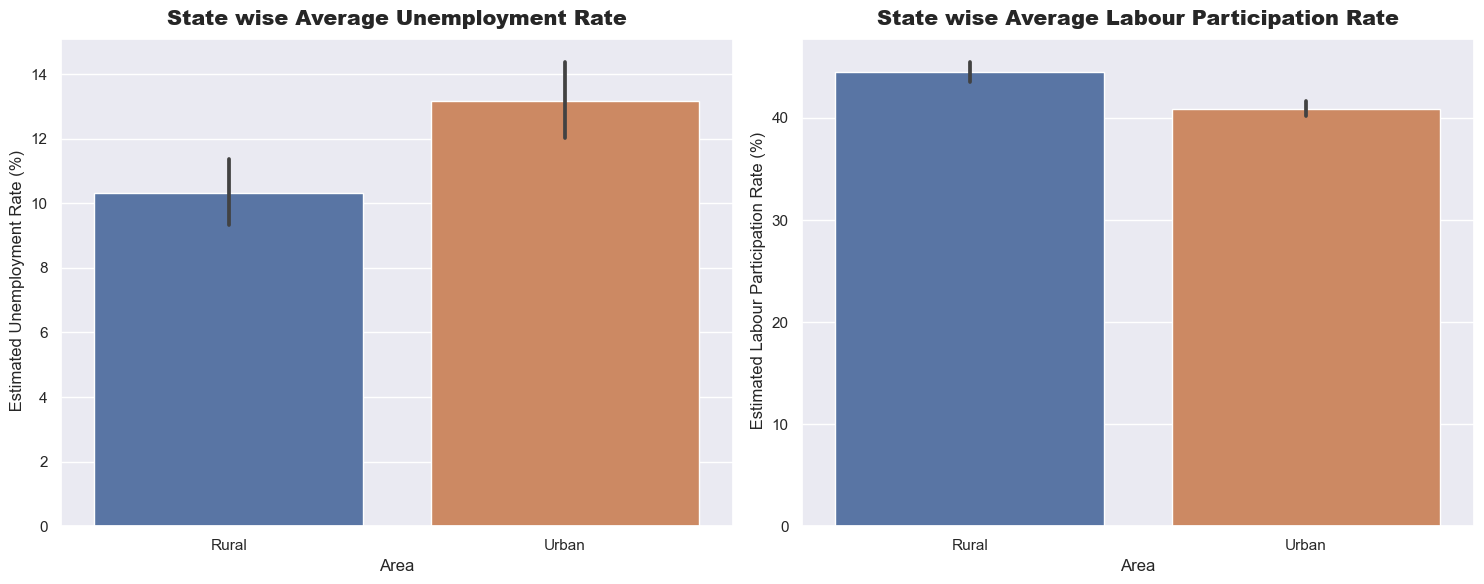

In [161]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=d.Area,y=d[' Estimated Unemployment Rate (%)'])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.barplot(x=d.Area,y=d[' Estimated Labour Participation Rate (%)'])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=15,pad=10)
plt.tight_layout()
plt.show()

### Observations

1. We can clearly observe that **Urban** Area has more **Unemployment Rate** when compared with **Rural** Area.
2. But when it comes to **Labour Participation Rate** , **Rural** Area is having more labours when compared with **Urban** Area

### Insights

* **Urban** Area is having more Unemployment Rate even though of low labour rate when compared with **Rural** Area.

In [175]:
d.columns

Index(['Region', ' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)', 'Area', 'Date', 'Month',
       'Year', 'Weekday', 'Year_Month'],
      dtype='object')

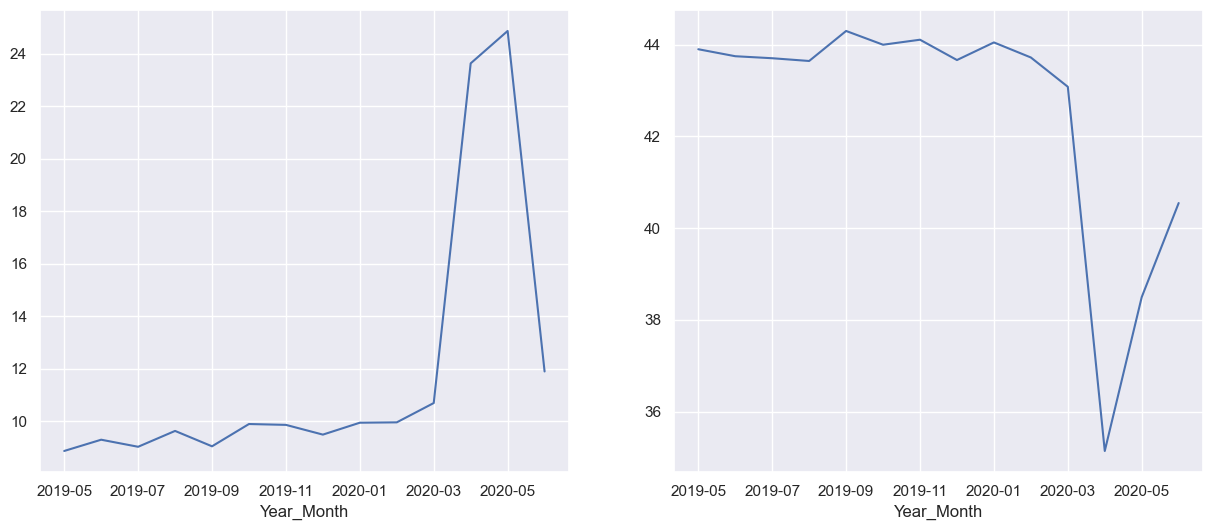

In [184]:
plt.figure(figsize=(15,6))
x=d.sort_values('Year_Month')
plt.subplot(1,2,1)
x.groupby('Year_Month')[' Estimated Unemployment Rate (%)'].mean().plot()

plt.subplot(1,2,2)
x=d.groupby('Year_Month')[' Estimated Labour Participation Rate (%)'].mean().plot()
plt.show()

### Observations

1. From the first plot we can clearly observe that in the month of March to May in 2020 there was a huge increment in Unemployment Rate
2. From the second plot we can clearly observe that in the month of March to April in 2020 there was a huge decrement in Labour Rate

### Insights

* We know that COVID-19 came in India in the month of January in 2020 and the first nationwide lockdown in India was announced by Prime Minister Narendra Modi on March 24, 2020, in response to the COVID-19 pandemic.
* So we can make an insight that due to the COVID-19 Lockdown there was a huge increment in Unemployment Rate and Huge Decrement in Labour Rate.

## Summary

Unemployment Analysis in India using Python

Key-Points

💡 First we did the Basic Understanding of the dataset.

💡 Then we performed Data Wrangling and did all the cleaning and statistical analysis.

💡 Then we performed Exploratory Data Analysis to generaate the insights.

💡 In the end we generated an insight that Most of states were having drastic increment in Unemployment Rate during the Lockdown.